![](Images/2022-11-27-16-53-57.png)

# this is the circles' radiuses
![](Images/2022-11-27-16-56-32.png)

# we also need the width and length of the rectangle to less than 100

In [113]:
# Create the dat file
param_file ="""
param:  I : R:=
        1   2
        2   1.2
        3   1.8
        4   0.9
        5   3.2
        6   0.7;
"""

with open("10_params.dat", 'w') as file:
        file.write(param_file)

### when I have a series of indexed variables
Just Define the variable and pass the series of indices as a first parameter
![](Images/2022-11-27-17-16-05.png)
![](Images/2022-11-27-17-15-48.png)

In [114]:
# import Libraries
import pyomo.environ as pyo
import numpy as np
import matplotlib.pyplot as plt

In [115]:
# initialize the abstract model
model = pyo.AbstractModel()

# Declare the parameters and the variables
model.I = pyo.Set()
model.J = pyo.Set(initialize=model.I)
model.R = pyo.Param(model.I)

model.W = pyo.Var(bounds=(0,100), within=pyo.NonNegativeReals, initialize=0)
model.L = pyo.Var(bounds=(0,100), within=pyo.NonNegativeReals, initialize=0)
##
def lower_bound(model, i):
    return (model.R[i], 100)
model.x = pyo.Var(model.I,  within=pyo.NonNegativeReals, initialize=0)
model.y = pyo.Var(model.I, bounds=lower_bound, within=pyo.NonNegativeReals, initialize=0)

# Declare the constraints
def con_01_fun(model,i,j):
    if i > j:
        return (model.x[i] - model.x[j])**2 + (model.y[i] - model.y[j])**2 >= (model.R[i] + model.R[j])**2
    else:
        return pyo.Constraint.Skip
model.c1 = pyo.Constraint(model.I, model.J, rule=con_01_fun)

def con_02_fun(model,i):
    return  model.R[i] <= model.x[i]
model.c2 = pyo.Constraint(model.I, rule=con_02_fun)

def con_02_1_fun(model,i):
    return  model.x[i] <= model.W - model.R[i]
model.c2_1 = pyo.Constraint(model.I, rule=con_02_1_fun)

def con_03_fun(model,j):
    return  model.y[j] <= model.L - model.R[j]
model.c3 = pyo.Constraint(model.J, rule=con_03_fun)

# Declare the objective function
model.OF = pyo.Objective(expr=model.L * model.W , sense=pyo.minimize)

# Define the solver
solver = pyo.SolverFactory('ipopt')
instance = model.create_instance("10_params.dat")
results = solver.solve(instance)

results.write()

WARNING (W1002): Setting Var 'y[1]' to a numeric value `0` outside the bounds
    (2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'y[1]' to a numeric value `0` outside the bounds
    (2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'y[2]' to a numeric value `0` outside the bounds
    (1.2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'y[3]' to a numeric value `0` outside the bounds
    (1.8, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'y[4]' to a numeric value `0` outside the bounds
    (0.9, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'y[5]' to a numeric value `0` outside the bounds
    (3.2, 100).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Set

In [116]:
instance.pprint()

3 Set Declarations
    I : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    J : Size=1, Index=None, Ordered=Insertion
        Key  : Dimen : Domain : Size : Members
        None :     1 :    Any :    6 : {1, 2, 3, 4, 5, 6}
    c1_index : Size=1, Index=None, Ordered=True
        Key  : Dimen : Domain : Size : Members
        None :     2 :    I*J :   36 : {(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)}

1 Param Declarations
    R : Size=6, Index=I, Domain=Any, Default=None, Mutable=False
        Key : Value
          1 :     2
          2 :   1.2
          3 :   1.8
          4 :   0.9
          5 :   3.2
          6 :   0.7

4 Var Declarations
    L : S

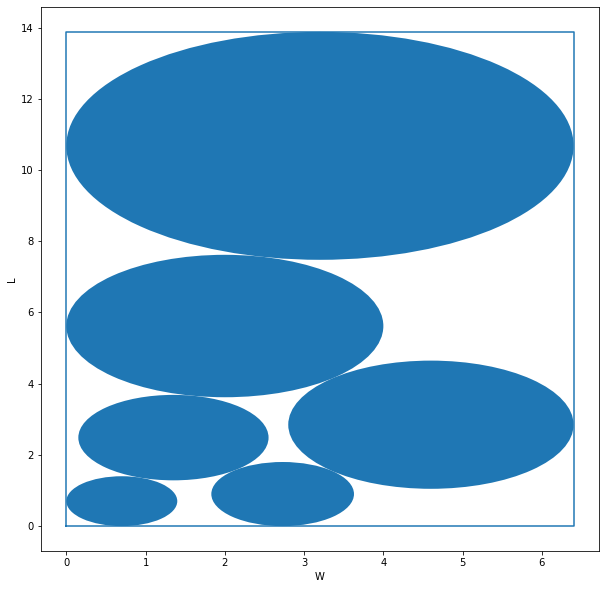

In [117]:
L = pyo.value(instance.L)
W = pyo.value(instance.W)
x = [pyo.value(instance.x[i]) for i in instance.I]
y = [pyo.value(instance.y[i]) for i in instance.I]
R = [pyo.value(instance.R[i]) for i in instance.I]

plt.figure(figsize=(10,10))
ax = plt.subplot()

# plt.scatter(x,y)
plt.plot([0,0,W,W,0],[0,L,L,0,0])
plt.ylabel('L')
plt.xlabel('W')
for i in range(len(x)):
    c = plt.Circle((x[i],y[i]), R[i], )
    ax.add_patch(c)

In [118]:
L,W

(13.8780337252341, 6.399999936425104)